In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns


In [229]:
# Load dataset with full path
df = pd.read_csv("./raw_data/housing-prices-dataset/Housing.csv")

# Display basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

Preprocess Data

In [230]:
# Handle categorical variables
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
label_encoders = {}
for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [231]:
# One-Hot Encode 'furnishingstatus' only if it exists
if 'furnishingstatus' in df.columns:
    df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
else:
    print("⚠️ Warning: 'furnishingstatus' is already encoded. Skipping one-hot encoding.")

In [232]:
# Define features & target
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target

In [233]:
# Scale numerical features
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])



In [234]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [235]:
# Train models
models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(random_state=42),
    "Lasso": Lasso(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Machine": SVR(kernel='linear')
}

In [236]:
# Fit models
for name, model in models.items():
    model.fit(X_train, y_train)

In [237]:
# Evaluate models
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "R² Score": r2}
    print(f"{name} - MAE: {mae:.2f}, R² Score: {r2:.4f}")

Gradient Boosting - MAE: 960513.57, R² Score: 0.6658
Linear Regression - MAE: 970043.40, R² Score: 0.6529
Ridge - MAE: 971333.46, R² Score: 0.6521
Lasso - MAE: 970044.01, R² Score: 0.6529
Random Forest - MAE: 1018481.11, R² Score: 0.6118
Decision Tree - MAE: 1195266.06, R² Score: 0.4771
Support Vector Machine - MAE: 1763590.78, R² Score: -0.1012


In [238]:
# Feature Importance (Random Forest)
rf_model = models["Random Forest"]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

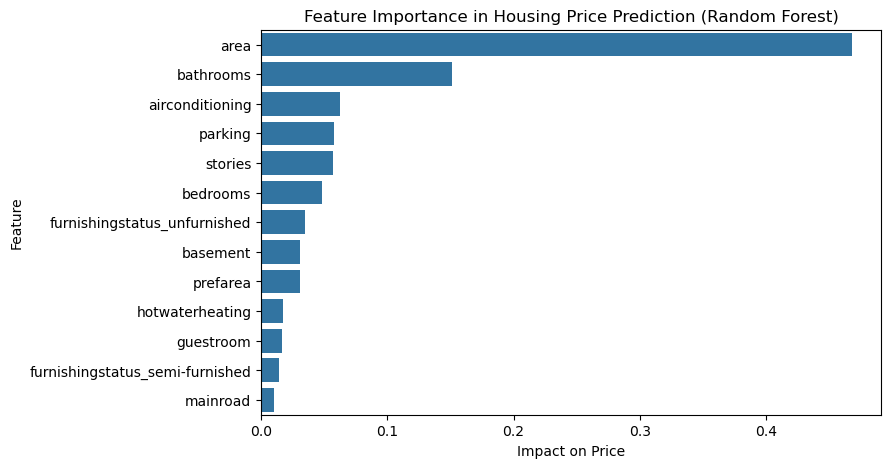

AttributeError: Rectangle.set() got an unexpected keyword argument 'rot'

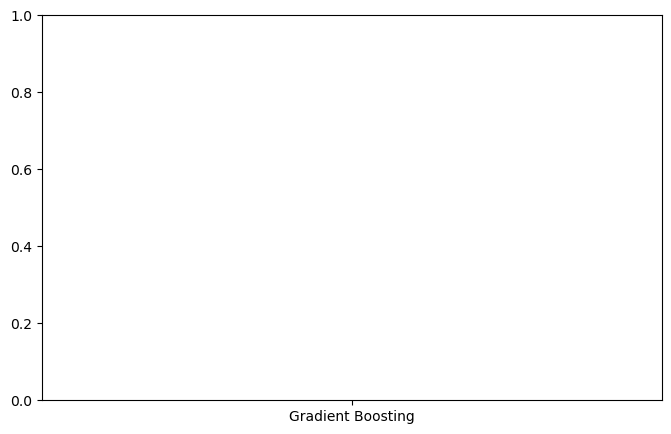

In [ ]:
# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.xlabel("Impact on Price")
plt.ylabel("Feature")
plt.title("Feature Importance in Housing Price Prediction (Random Forest)")
plt.show()

# Compare Model Performance
results_df = pd.DataFrame(results).T
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y=results_df["MAE"])
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (Lower is Better)")
plt.title("Model Performance - MAE")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y=results_df["R² Score"])
plt.xlabel("Model")
plt.ylabel("R² Score (Higher is Better)")
plt.title("Model Performance - R² Score")
plt.show()

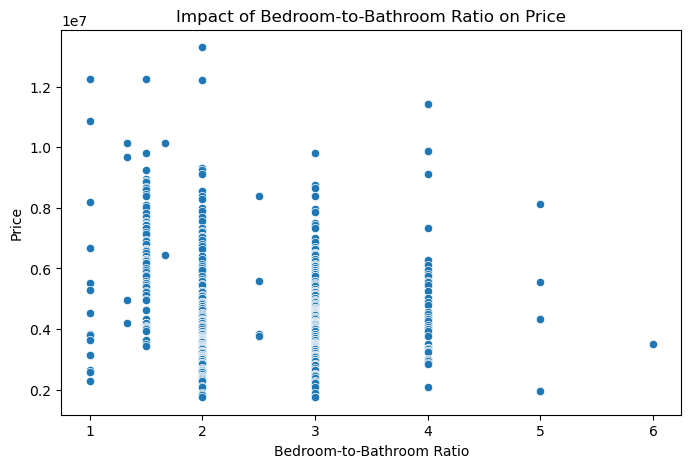

In [189]:
# Analyze the impact of Bedroom-to-Bathroom Ratio on Price
df["bed_bath_ratio"] = df["bedrooms"] / df["bathrooms"]

plt.figure(figsize=(8,5))
sns.scatterplot(x=df["bed_bath_ratio"], y=df["price"])
plt.xlabel("Bedroom-to-Bathroom Ratio")
plt.ylabel("Price")
plt.title("Impact of Bedroom-to-Bathroom Ratio on Price")
plt.show()

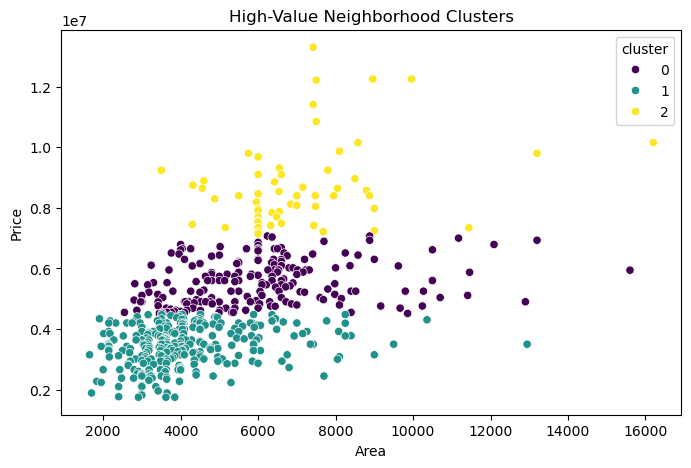

In [190]:
# K-Means Clustering to identify high-value neighborhoods
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(df[["area", "price"]])

# Visualizing clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["area"], y=df["price"], hue=df["cluster"], palette="viridis")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("High-Value Neighborhood Clusters")
plt.show()

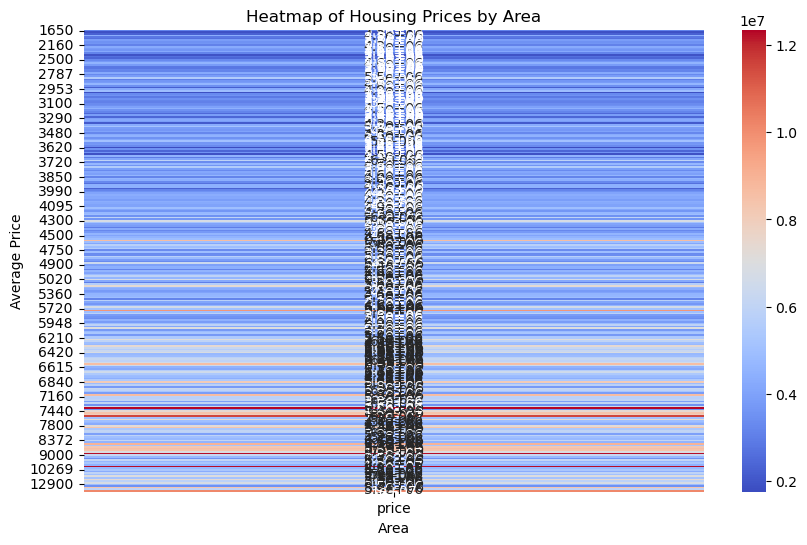

In [191]:
# Creating a heatmap of housing prices
df_pivot = df.pivot_table(index="area", values="price", aggfunc="mean")
plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, cmap="coolwarm", annot=True)
plt.xlabel("Area")
plt.ylabel("Average Price")
plt.title("Heatmap of Housing Prices by Area")
plt.show()